# Homework 1

In this first step, I will import the libraries that I will use in this homework.

In [1]:
import numpy as np
import pandas as pd
import glob
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from itertools import product
from sklearn.ensemble import VotingClassifier
from sklearn import preprocessing
%matplotlib inline

The following piece of code permits to:
- Read raw pixels of all images, for the four class provided in the PACS folder.
- Convert every image into 154587-dimensional vector and prepare 1087x154587 matrix X_m
- Prepare a 1087-dimensional vector y that contains ordinal label of the image ('dog','guitar','house','person) 

In [2]:
for i, filename in enumerate (glob.glob('C:\\Users\Rocco\\Desktop\\homework ML&AI\\elaborati\\PACS_homework\\dog\\*.jpg')): 
    if i==0: 
        X_m=(np.asarray(Image.open(filename)).ravel())
        y='dog'
        y=np.asarray(y)
    if i>0:
        img_data=(np.asarray(Image.open(filename)).ravel()) 
        X_m=np.vstack((X_m,img_data))
        y=np.vstack((y,'dog'))
for i, filename in enumerate (glob.glob('C:\\Users\Rocco\\Desktop\\homework ML&AI\\elaborati\\PACS_homework\\guitar\\*.jpg')): 
    img_data=(np.asarray(Image.open(filename)).ravel()) 
    X_m=np.vstack((X_m,img_data))
    y=np.vstack((y,'guitar'))
for i, filename in enumerate (glob.glob('C:\\Users\Rocco\\Desktop\\homework ML&AI\\elaborati\\PACS_homework\\house\\*.jpg')): 
    img_data=(np.asarray(Image.open(filename)).ravel()) 
    X_m=np.vstack((X_m,img_data))
    y=np.vstack((y,'house'))
for i, filename in enumerate (glob.glob('C:\\Users\Rocco\\Desktop\\homework ML&AI\\elaborati\\PACS_homework\\person\\*.jpg')): 
    img_data=(np.asarray(Image.open(filename)).ravel()) 
    X_m=np.vstack((X_m,img_data))
    y=np.vstack((y,'person'))    

In [3]:
#Standardize the matrix X_m
mean_X_m=X_m.mean(axis=0)
X = (X_m-mean_X_m )/ np.std(X_m)
#print(np.mean(X))
#print(np.var(X))

- Plot of the original image that I choose and construct the transformed matrix X_t

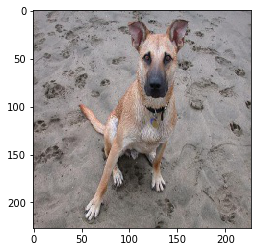

In [4]:
temp=np.reshape(X_m[1],(227,227,3))
plt.imshow(temp)
pca=PCA()
X_t=pca.fit_transform(X)

- Plot of the image that I choose, after re-projection using only the first 60 PCs

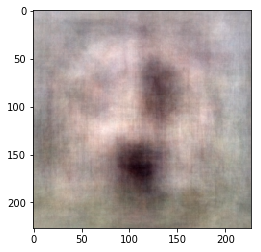

In [5]:
pca_60=PCA(60)
X_t_60=pca_60.fit_transform(X)
X_rec_60=(pca_60.inverse_transform(X_t_60[1])*np.std(X_m) + mean_X_m)
X_rec_60=(X_rec_60-X_rec_60.min())/(X_rec_60.max()-X_rec_60.min())
X_rec_60=X_rec_60*255
temp_60 = np.reshape(X_rec_60,(227,227,3))
temp_60=temp_60.astype(np.uint8)
plt.imshow(temp_60)

- Plot of the image that I choose after re-projection using only the first 6 PCs

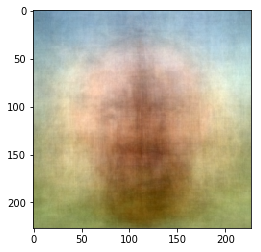

In [6]:
pca_6=PCA(6)
X_t_6=pca_6.fit_transform(X)
X_rec_6=(pca_6.inverse_transform(X_t_6[1])*np.std(X_m) + mean_X_m)
X_rec_6=(X_rec_6-X_rec_6.min())/(X_rec_6.max()-X_rec_6.min())
X_rec_6=(X_rec_6*255)
temp_6 = np.reshape(X_rec_6,(227,227,3))
temp_6=temp_6.astype(np.uint8)
plt.imshow(temp_6)

- Plot of the image that I choose, after re-projection using only the first 2 PCs

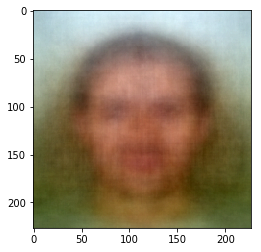

In [7]:
pca_2=PCA(2)
X_t_2=pca_2.fit_transform(X)
X_rec_2=(pca_2.inverse_transform(X_t_2[1])*np.std(X_m) + mean_X_m).astype(np.uint8)
X_rec_2=(X_rec_2-X_rec_2.min())/(X_rec_2.max()-X_rec_2.min())
X_rec_2=(X_rec_2*255)
temp_2 = np.reshape(X_rec_2,(227,227,3))
temp_2=temp_2.astype(np.uint8)
plt.imshow(temp_2)

- Plot of the image that I choose, after re-projection using only the last 6 PCs

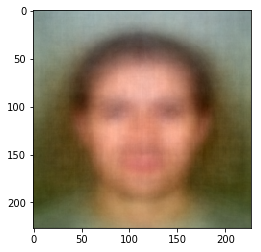

In [8]:
pca=PCA().fit(X)
pca_last6=X_m-mean_X_m
pca_last6=np.delete(pca.components_,np.s_[0:154581],1)
Y=X.T.dot(pca_last6)
X_rec_last_6=((pca_last6.dot(Y.T)*np.std(X_m))+mean_X_m)
X_rec_last_6=(X_rec_last_6-X_rec_last_6.min())/(X_rec_last_6.max()-X_rec_last_6.min())
X_rec_last_6=X_rec_last_6*255
temp_last_6 = np.reshape(X_rec_last_6[1],(227,227,3))
temp_last_6=temp_last_6.astype(np.uint8)
plt.imshow(temp_last_6)

- I compare the resulting images after re-projection respect to the original image

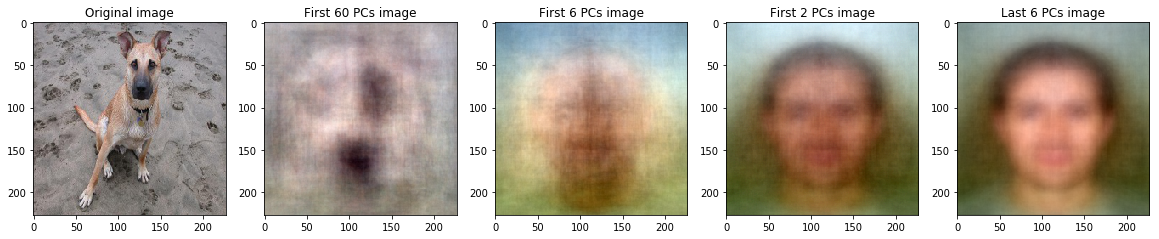

In [9]:
list_img=[temp,temp_60,temp_6,temp_2,temp_last_6]
fig=plt.figure(figsize=(20, 20))
columns = 5
rows = 1
for i in range(1, columns*rows+1):
    img = list_img[i-1]
    fig.add_subplot(rows, columns, i)
    if i==1:
        plt.title('Original image')
    if i==2:
        plt.title('First 60 PCs image')
    if i==3:
        plt.title('First 6 PCs image')
    if i==4:
        plt.title('First 2 PCs image')
    if i==5:
        plt.title('Last 6 PCs image')
    plt.imshow(img)
plt.show()

In [10]:
#Transform y array in a Dataframe, this representation is useful when I will visualize scatter-plot.
df=pd.DataFrame(y,columns=['class'])
y=df['class'].values
#print(y)

- Visualization of X_t using scatter-plot with different color and markers for different classes, using 1st and 2nd PC

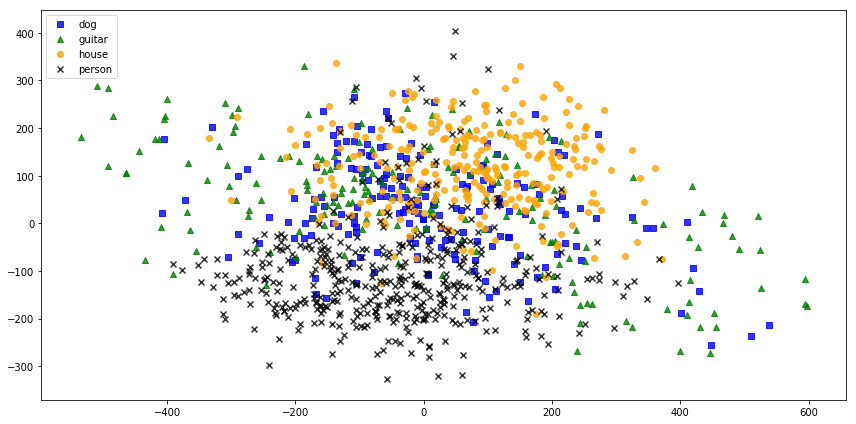

In [11]:
fig=plt.figure(figsize=(12, 6))
colors=['blue','green','orange','black']
markers=['s','^','o','x']

for lab,col,m in zip(np.unique(y),colors,markers):
    plt.scatter(X_t[y==lab,0],X_t[y==lab,1],label=lab,c=col,marker=m,alpha=0.8)
    
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- Visualization of X_t using scatter-plot with different color and markers for different classes, using 3rd and 4th PC

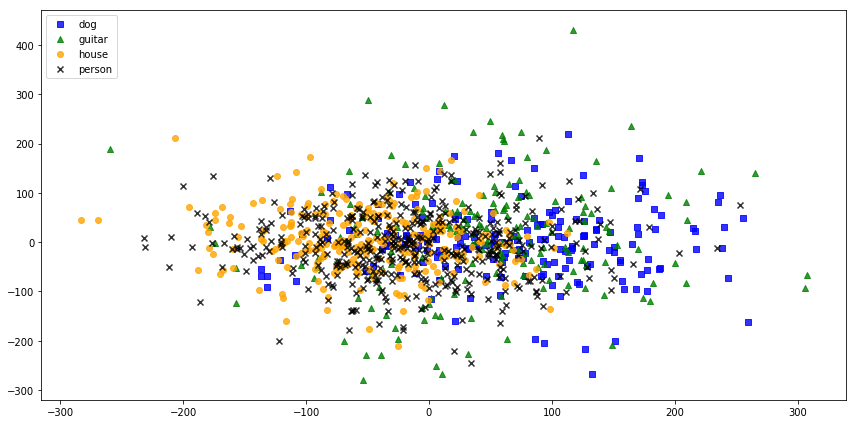

In [12]:
fig=plt.figure(figsize=(12, 6))

for lab,col,m in zip(np.unique(y),colors,markers):
   plt.scatter(X_t[y==lab,2],X_t[y==lab,3],label=lab,c=col,marker=m,alpha=0.8)
    
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- Visualization of X_t using scatter-plot with different color and markers for different classes, using 10th and 11th PC

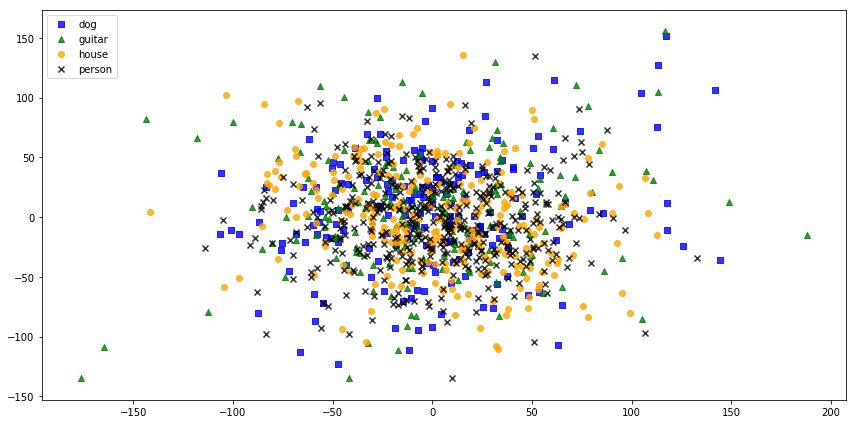

In [13]:
fig=plt.figure(figsize=(12, 6))

for lab,col,m in zip(np.unique(y),colors,markers):
    plt.scatter(X_t[y==lab,9],X_t[y==lab,10],label=lab,c=col,marker=m,alpha=0.8)
    
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



- Considerations about the previous scatter-plot:

    From the previous scatter_plot I notice that if I visualize the scatter plot considering the first two principal components, the elements of each different class are better separated respect to the other cases and then it is easier to distinguish if one element belongs to one class or to another class.

    If I visualize the scatter-plot using third and fourth principal component and even later when I will visualize the scatter-plot using tenth and eleventh principal component, it will be increasingly difficult to distinguish the elements of one class respect to the elements of another classes infact there is an increasining overlap between the elements that belong to the different classes.

    This behaviour is due to the fact that the first principal components explain a cumulative variance higher than the subsequent principal components; thus the first principal components capture more relevant informations about the elements as we expect, because we implicitly sort the principal components in descendet order of variance explained.

I can decide the proportion of distortion of data introduced by the selected principal component on the basis of the variance that each principal component explain and then if I choose more than one principal component I decide it on the basis of the cumulative variance that principal components explain. The higher the explained variance by the principal components the lower the distortion of data will be.

- I split the dataset in training and test set using 'stratify' to mantain the same intial proportion of elements for each class. In this splitting I consider all PCs

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42,stratify=y)
model=GaussianNB()
model_learn = model.fit(x_train,y_train)
comparison=pd.DataFrame(index=['All PC'],columns=['Train score','Test score'])
comparison['Train score']=model_learn.score(x_train,y_train)
comparison['Test score']=model_learn.score(x_test,y_test)
comparison

,Train score,Test score
All PC,0.777096,0.688073


- I split the dataset in training and test set considering the first two PCs only.

In [16]:
x_train_1_2,x_test_1_2,y_train_1_2,y_test_1_2 = train_test_split(X_t_2,y,test_size=0.1,random_state=42,stratify=y)
model_learn_1_2=model.fit(x_train_1_2,y_train_1_2)
comparison=pd.DataFrame(index=['1st & 2 PC'],columns=['Train score','Test score'])
comparison['Train score']=model_learn_1_2.score(x_train_1_2,y_train_1_2)
comparison['Test score']=model_learn_1_2.score(x_test_1_2,y_test_1_2)
comparison

,Train score,Test score
1st & 2 PC,0.616564,0.614679


- I split the dataset in training and test set considering 3rd and 4th PCs only.

In [17]:
pca_3_4=PCA(4)
X_t_3_4=pca_3_4.fit_transform(X)
X_rec_3_4=np.delete(X_t_3_4,np.s_[0:2],1)
#print(X_rec_3_4.shape)
x_train_3_4,x_test_3_4,y_train_3_4,y_test_3_4 = train_test_split(X_rec_3_4,y,test_size=0.1,random_state=42,stratify=y)
#print('X_train dim:', x_train_3_4.shape)
#print('X_test dim:',x_test_3_4.shape)
model_learn_3_4 = model.fit(x_train_3_4,y_train_3_4)
comparison=pd.DataFrame(index=['3rd & 4th PC'],columns=['Train score','Test score'])
comparison['Train score']=model_learn_3_4.score(x_train_3_4,y_train_3_4)
comparison['Test score']=model_learn_3_4.score(x_test_3_4,y_test_3_4)
comparison

,Train score,Test score
3rd & 4th PC,0.452965,0.440367


Considerations about the previous scores:

- If I consider all principal components I get that my model learn better than in the other two cases (when I use 1st & 2nd principal component and when I use 3rd & 4th principal component) and the test score is better even if there is a sligthly marked difference between train score and test score ( probably there is a slighly overfitting).
- If I consider 1st & 2nd principal component train score and test score go down respect to the case in which I consider all principal components, because the model with only the first two principal components capture a significant characteristics of the elements but not so much as when I use all principal components.
- If I consider 3rd & 4th principal component the train score and test score go down respect to the case in which I consider 1st and 2nd principal components, because 3rd and 4th principal component represent not so well the relevant characteristic of the elements such as 1st and 2nd principal component.

    Then in order of application we have a decresing score because the model take less and less the relevant characteristic of the elements.

- The following pieces of code permit to visualize decision boundaries of classifier after re-projection using the first two PCs only.

In [18]:
le = preprocessing.LabelEncoder()
y= le.fit_transform(y)
clf1 = GaussianNB()
eclf = VotingClassifier(estimators=[('NB', clf1)],voting='soft')
clf1.fit(X_t_2, y)
x_min, x_max = X_t_2[:, 0].min() - 1, X_t_2[:, 0].max() + 1
y_min, y_max = X_t_2[:, 1].min() - 1, X_t_2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

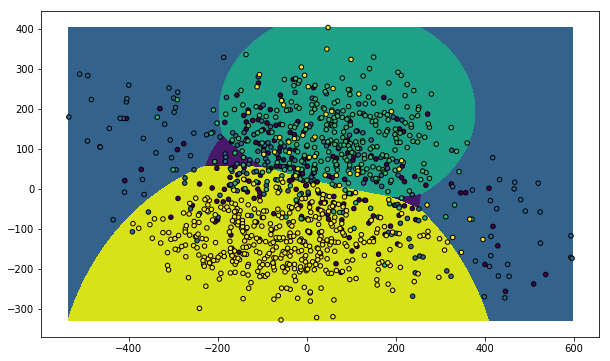

In [ ]:
f=plt.figure(figsize=(10,6))
for clf, tt in zip([clf1],['NB']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z)
    plt.scatter(X_t_2[:, 0], X_t_2[:, 1], c=y,s=20, edgecolor='k')
    
plt.show()
